# **MINST Dataset**

# import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers, datasets, models
from skimage.io import imread,imshow,imsave
import skimage
import cv2

# Read Data

In [ ]:
(x_train,y_train) , (x_test,y_test) = datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

# Checking train dataset

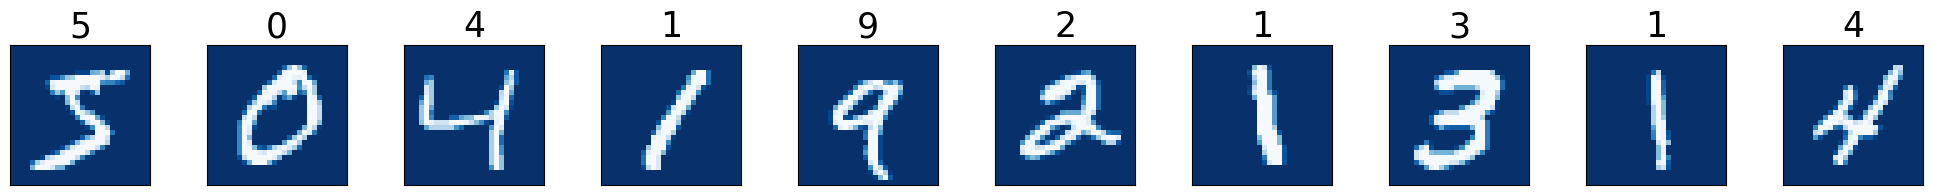

In [ ]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[idx], cmap='Blues_r')
    ax.set_title(str(y_train[idx]),fontsize=25)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

<Axes: >

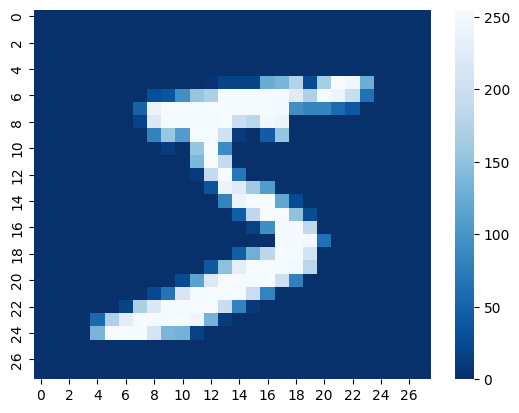

In [ ]:
sns.heatmap(x_train[0], cmap='Blues_r')

# Data Preprocessing

### Normalize the pixel values of the images to be in the range [0, 1]

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

<Axes: >

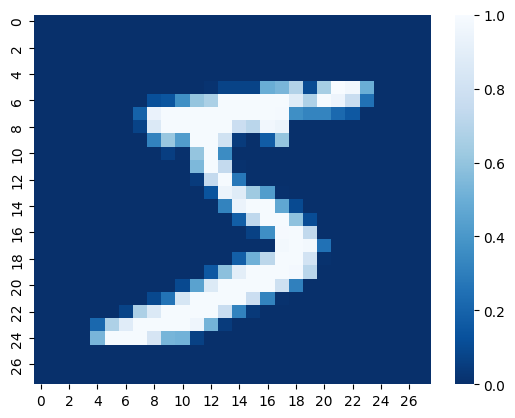

In [ ]:
sns.heatmap(x_train[0], cmap='Blues_r')

### Reshape the input images

In [ ]:
# Reshape the images to add a channel dimension (for Conv2D)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

### One Hot Encoding

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

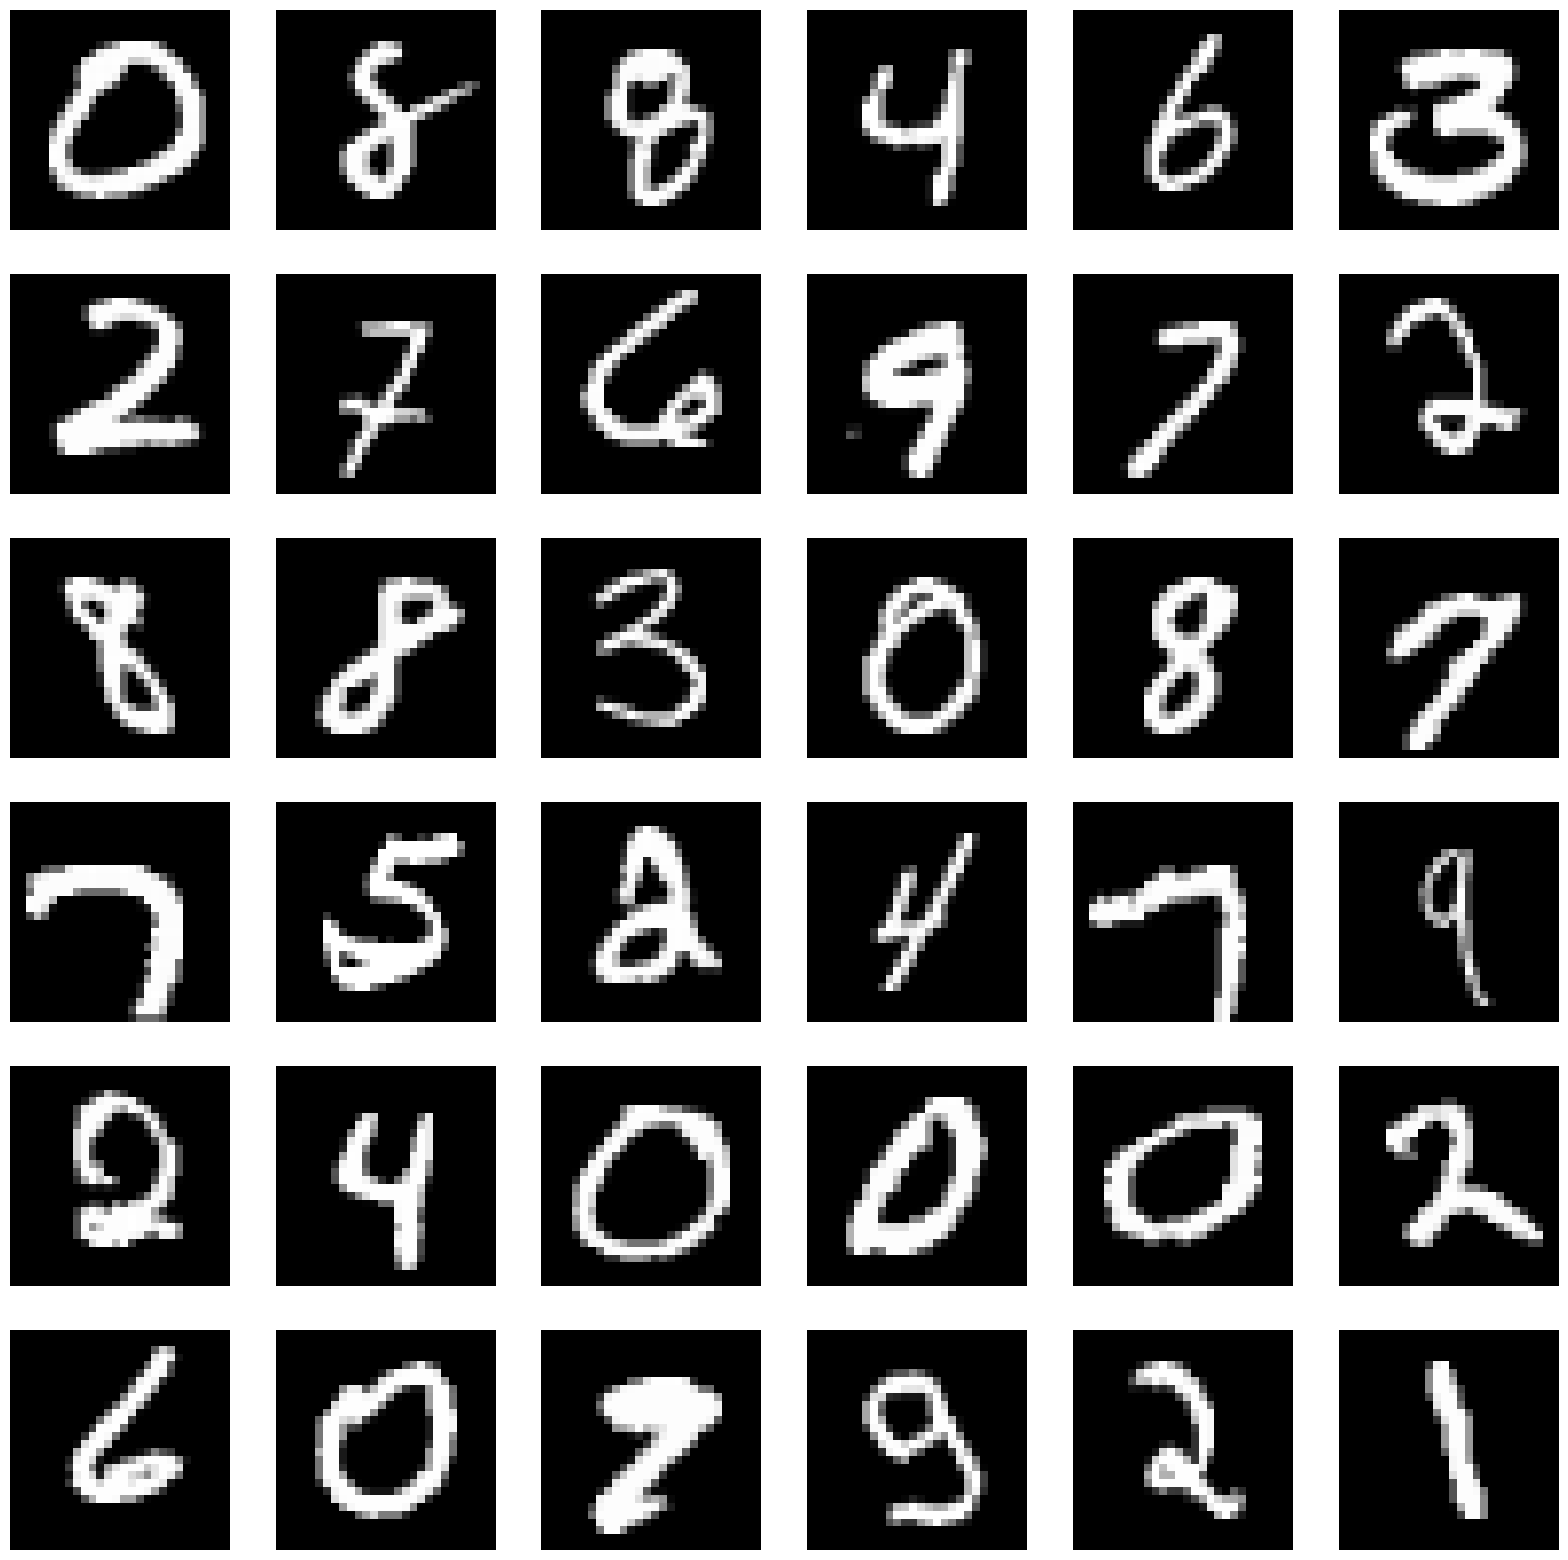

In [ ]:
plt.figure(figsize=(20,20))

for n,i in enumerate(list(np.random.randint(0,len(x_train),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')



# Build Model

### Model Architecture (LeNet-5)

In [ ]:
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1)),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_8 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

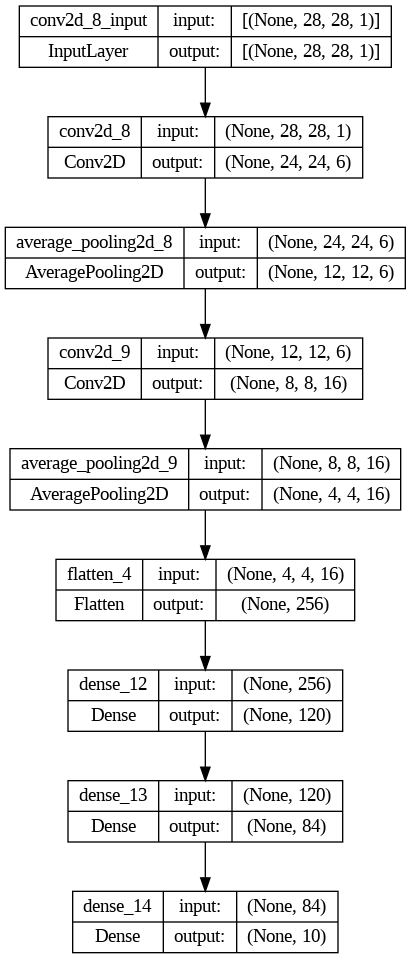

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

### Compiles the model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

### Model Traning

In [ ]:
training_history = model.fit(x_train,y_train, epochs = 15, validation_split= 0.1 , batch_size = 128 )

Epoch 1/15
422/422 [==============================] - 22s 50ms/step - loss: 0.3912 - accuracy: 0.8854 - val_loss: 0.1564 - val_accuracy: 0.9565
Epoch 2/15
422/422 [==============================] - 19s 44ms/step - loss: 0.1496 - accuracy: 0.9547 - val_loss: 0.1026 - val_accuracy: 0.9707
Epoch 3/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0996 - accuracy: 0.9702 - val_loss: 0.0796 - val_accuracy: 0.9777
Epoch 4/15
422/422 [==============================] - 21s 49ms/step - loss: 0.0748 - accuracy: 0.9773 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 5/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 6/15
422/422 [==============================] - 20s 47ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0522 - val_accuracy: 0.9852
Epoch 7/15
422/422 [==============================] - 21s 49ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0451 - val_accuracy:

### Model Evaluation on Test set

In [ ]:
score_acc = model.evaluate(x_test,y_test)
score_acc

print('Test loss', score_acc[0])
print('Test Accuaracy', score_acc[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0596 - accuracy: 0.9823
Test loss 0.059608094394207
Test Accuaracy 0.9822999835014343


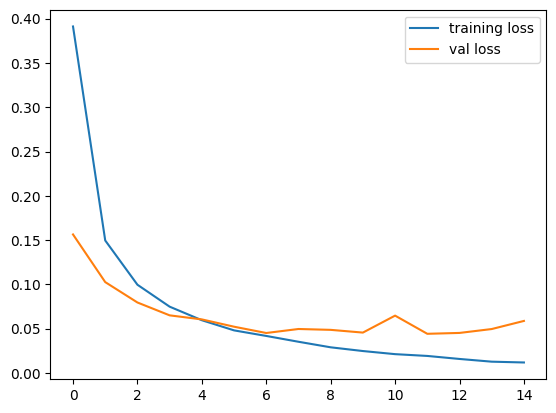

In [ ]:
plt.plot(training_history.history['loss'], label = 'training loss')
plt.plot(training_history.history['val_loss'], label = 'val loss')
plt.legend()

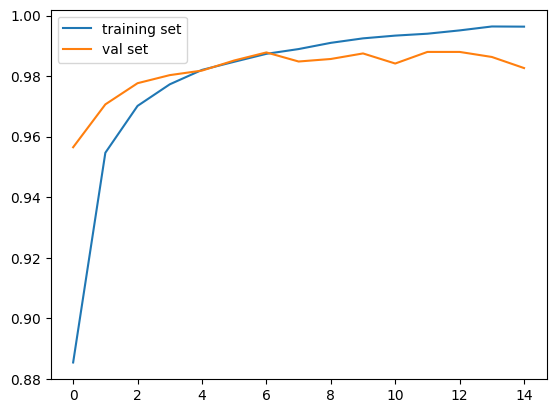

In [ ]:
plt.plot(training_history.history['accuracy'], label = 'training set')
plt.plot(training_history.history['val_accuracy'], label = 'val set')
plt.legend()

1/1 [==============================] - 0s 96ms/step
predict value  3


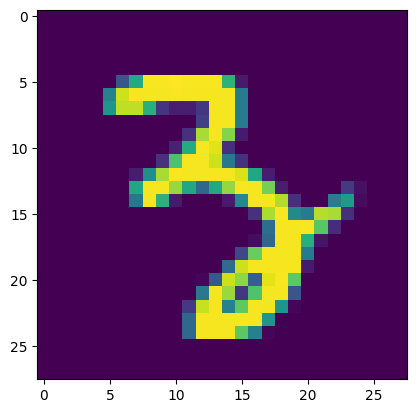

In [ ]:
plt.imshow(x_test[87].reshape(28,28))
test_value = model.predict(x_test[87].reshape(1,28,28,1))
test_value = test_value.argmax()
print('predict value ', test_value)

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis = 1)

313/313 [==============================] - 2s 6ms/step


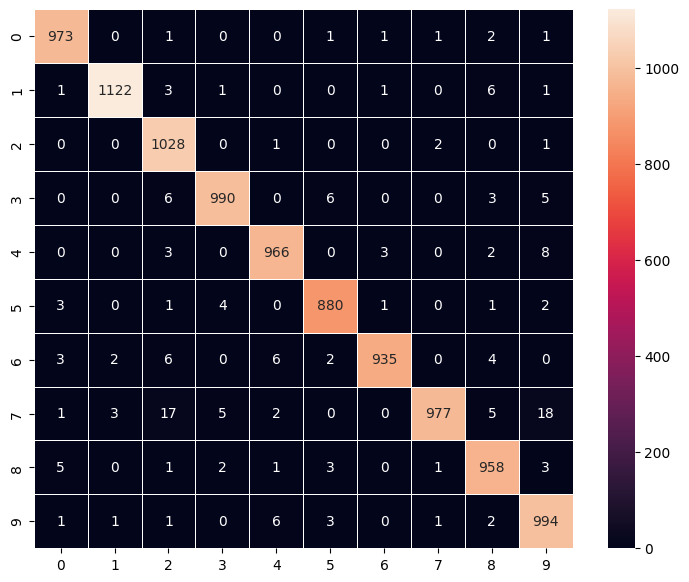

In [ ]:
import seaborn as sns
import tensorflow as tf

confusion_matrix = tf.math.confusion_matrix(np.argmax(y_test, axis=1), predictions)
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Save the model

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'CNN_model.joblib')

['CNN_model.joblib']